In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
std_df = pd.read_csv('processed_dataset/std_dataset.csv', index_col = 0)
std_df.head()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,...,0,0,0,0,0,0,0,0,0,0
1,5,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,...,0,0,0,0,0,1,0,0,0,0
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,...,0,0,0,0,0,0,0,0,0,1
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,...,0,0,0,0,0,0,0,0,0,0
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dev_df = std_df[:24488]
dev_df

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,...,0,0,0,0,0,0,0,0,0,0
1,5,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,...,0,0,0,0,0,1,0,0,0,0
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,...,0,0,0,0,0,0,0,0,0,1
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,...,0,0,0,0,0,0,0,0,0,0
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24483,3,-1.033403,-0.052572,0.565894,-1.252188,-0.369322,0.148865,0.550456,-0.008008,-0.190400,...,0,0,0,0,0,0,0,0,0,0
24484,1,-2.040803,2.574130,0.652278,1.019836,1.849641,1.062590,-2.391345,2.127041,1.969130,...,0,0,0,0,0,0,0,0,0,0
24485,5,1.295474,-0.098926,-1.263445,-1.019309,-1.275289,-1.244566,0.537277,-1.452946,-1.306954,...,0,0,0,0,1,0,0,0,0,0


In [4]:
countries = dev_df.columns[-27:]
dev_df = dev_df.drop(columns = countries)

# Dataset subdivision

In [5]:
thresholds = list(np.linspace(4.0,5.75,8))
thresholds

[4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75]

In [6]:
standard_df = dev_df.loc[dev_df['CO'] < 4.5, :]
extreme_df = dev_df.loc[dev_df['CO'] >= 4.5, :]
standard_df.shape, extreme_df.shape

((21652, 12), (2836, 12))

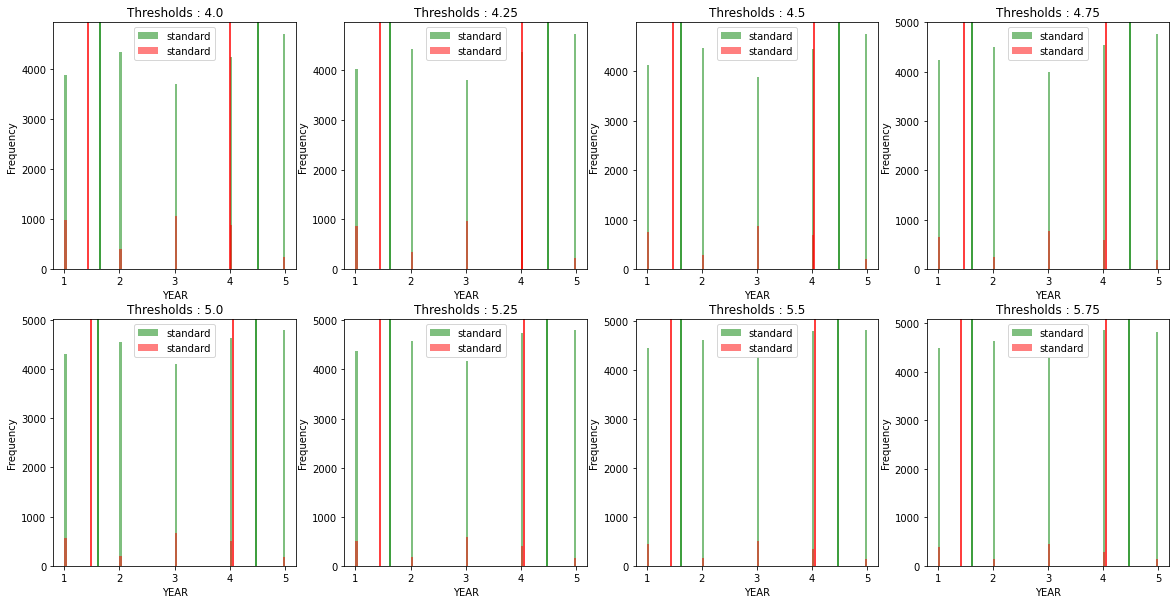

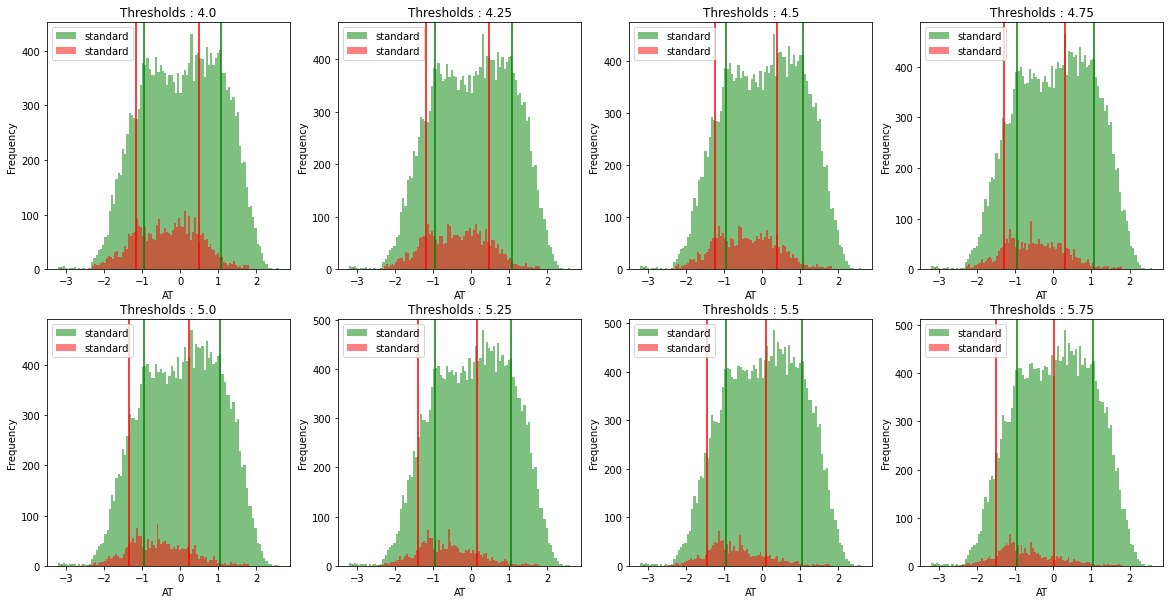

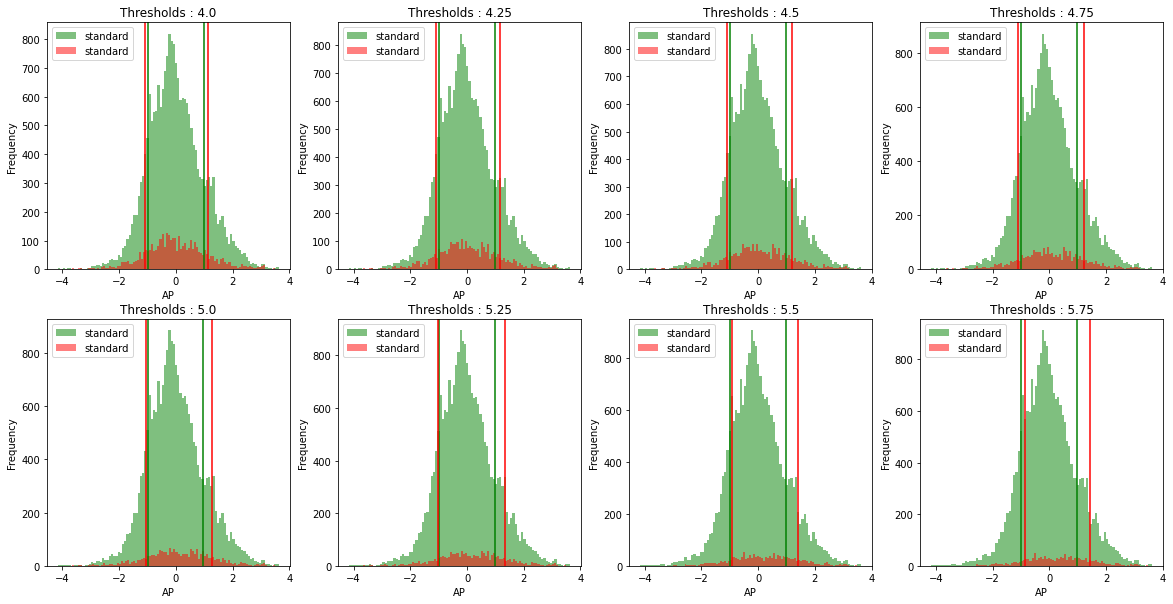

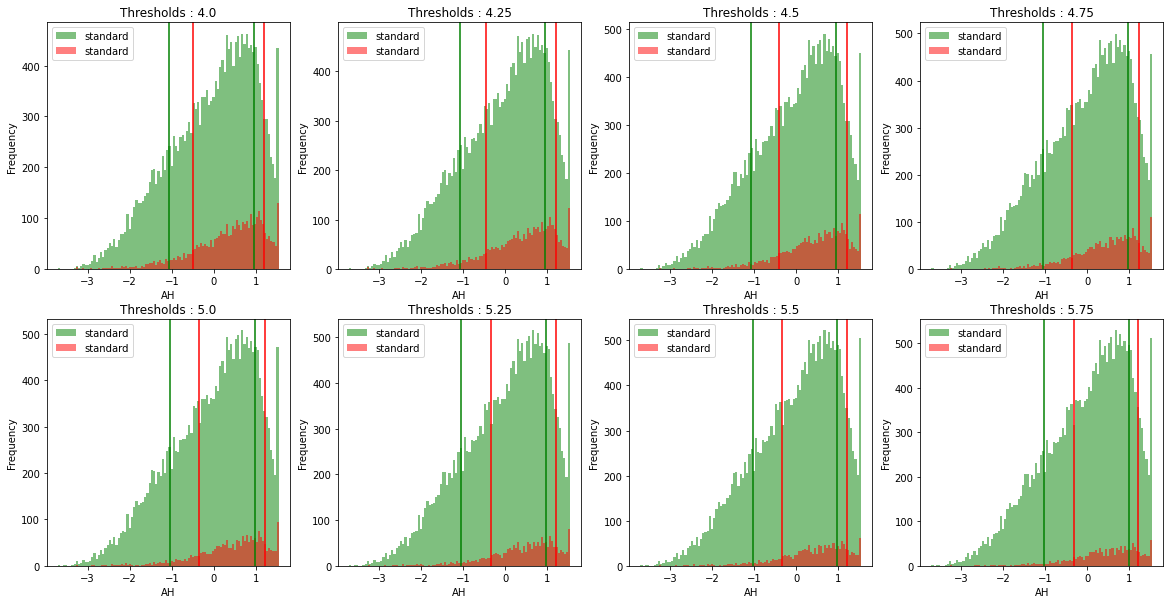

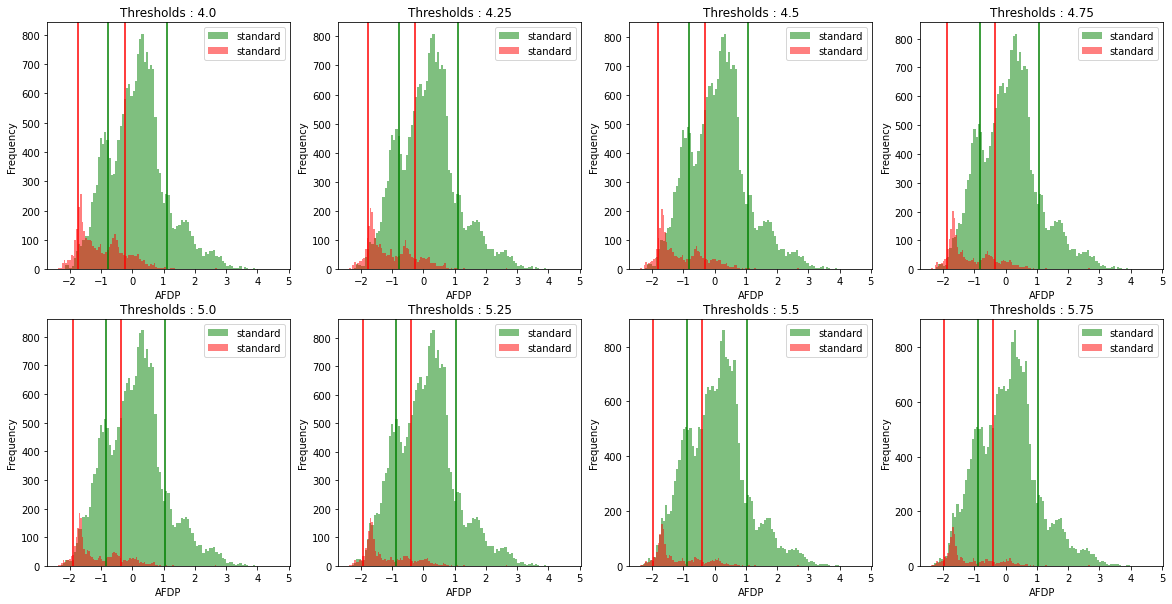

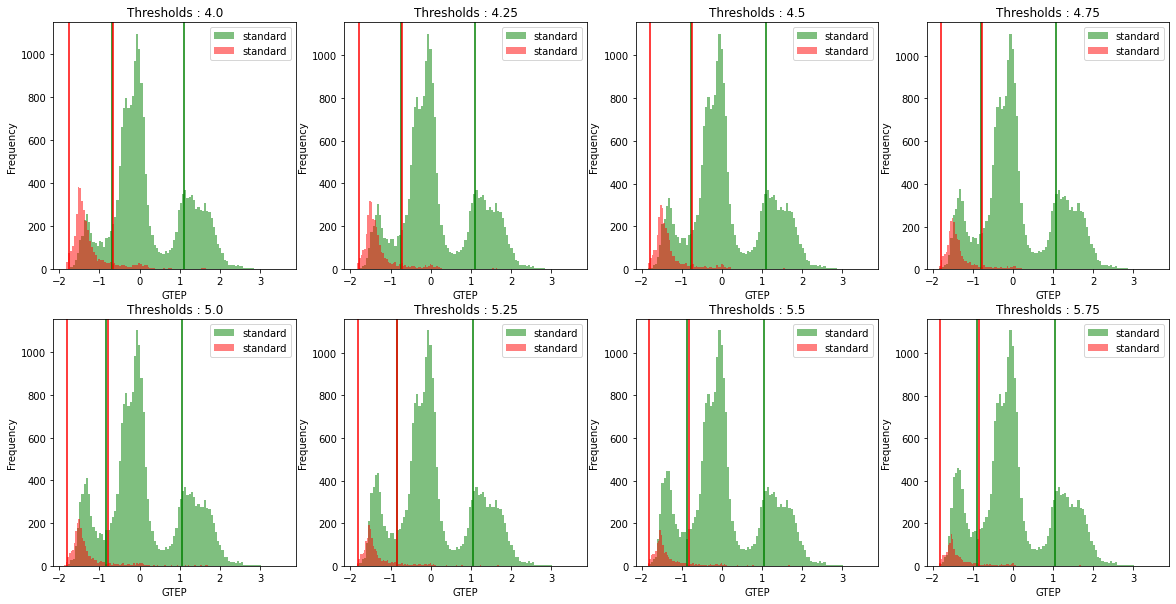

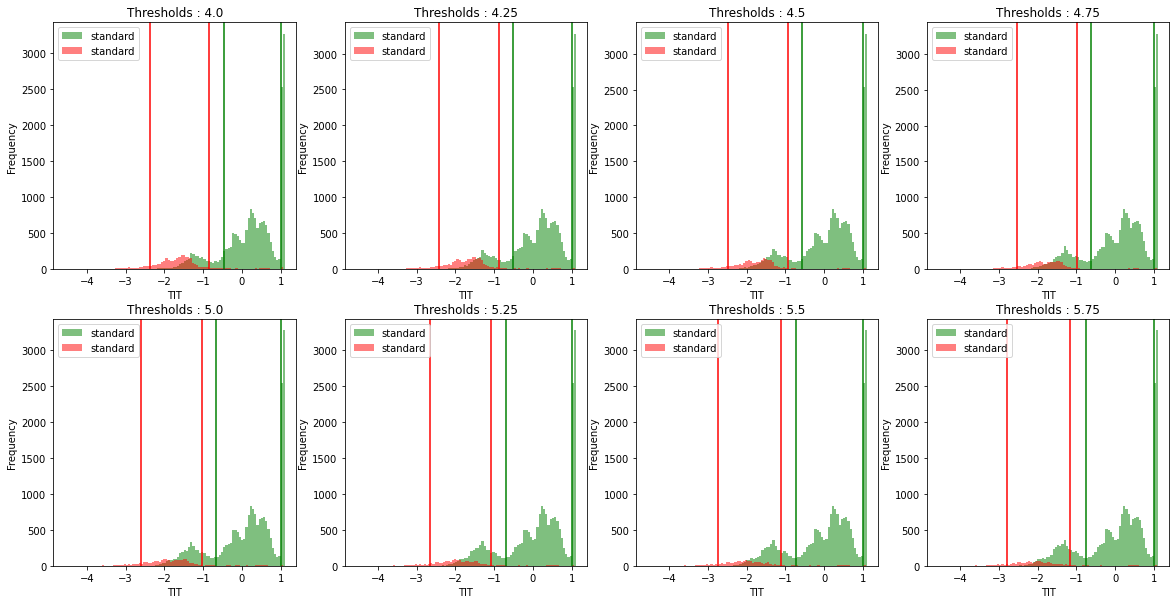

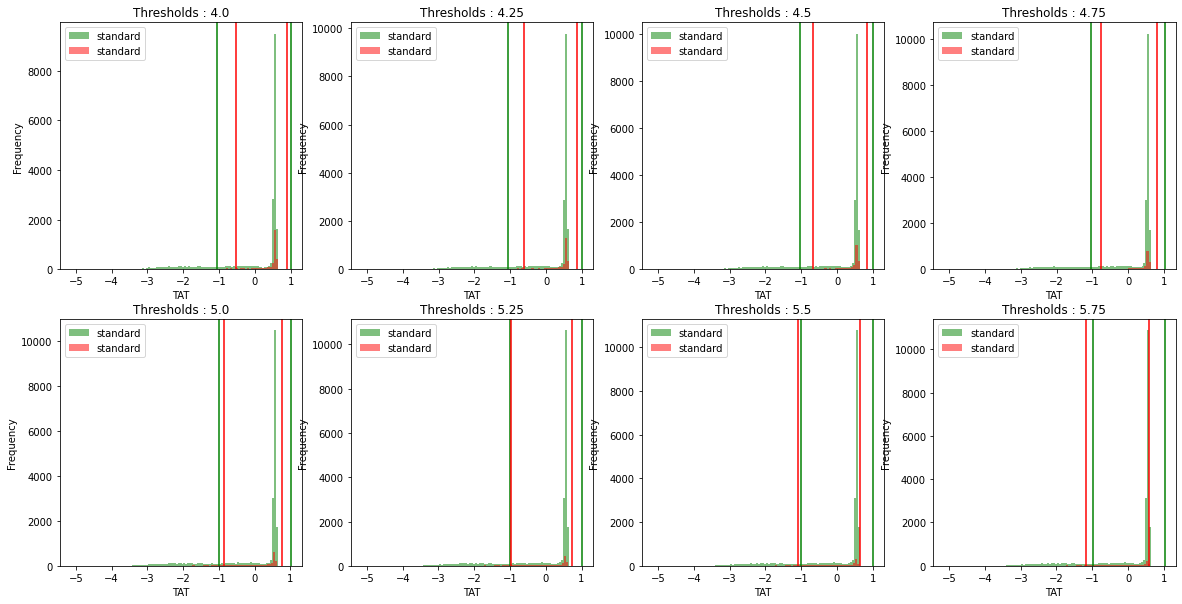

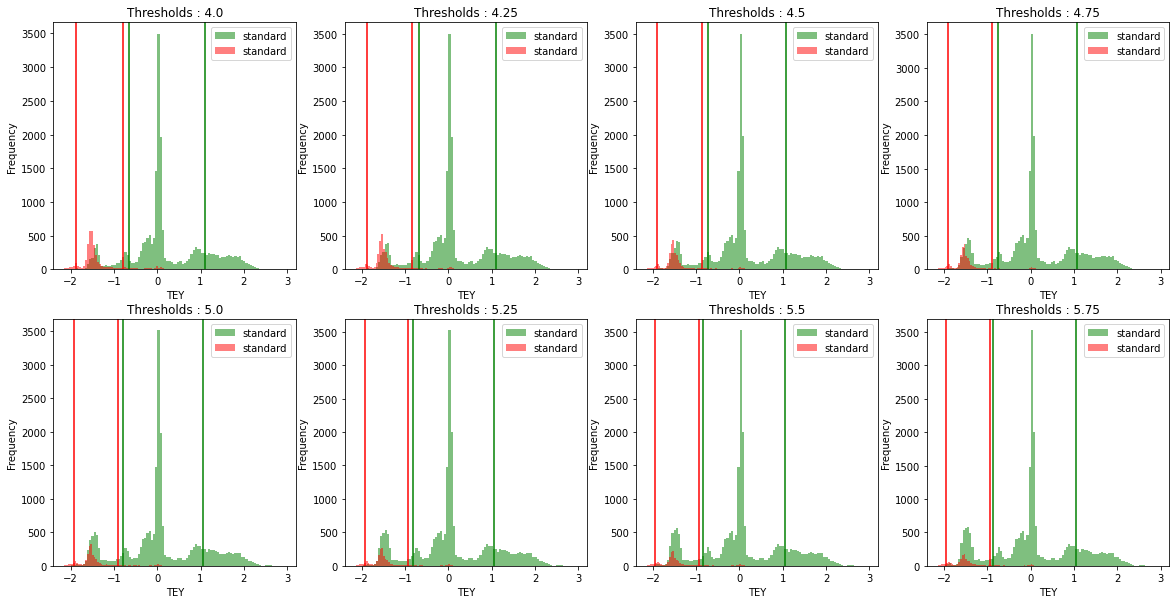

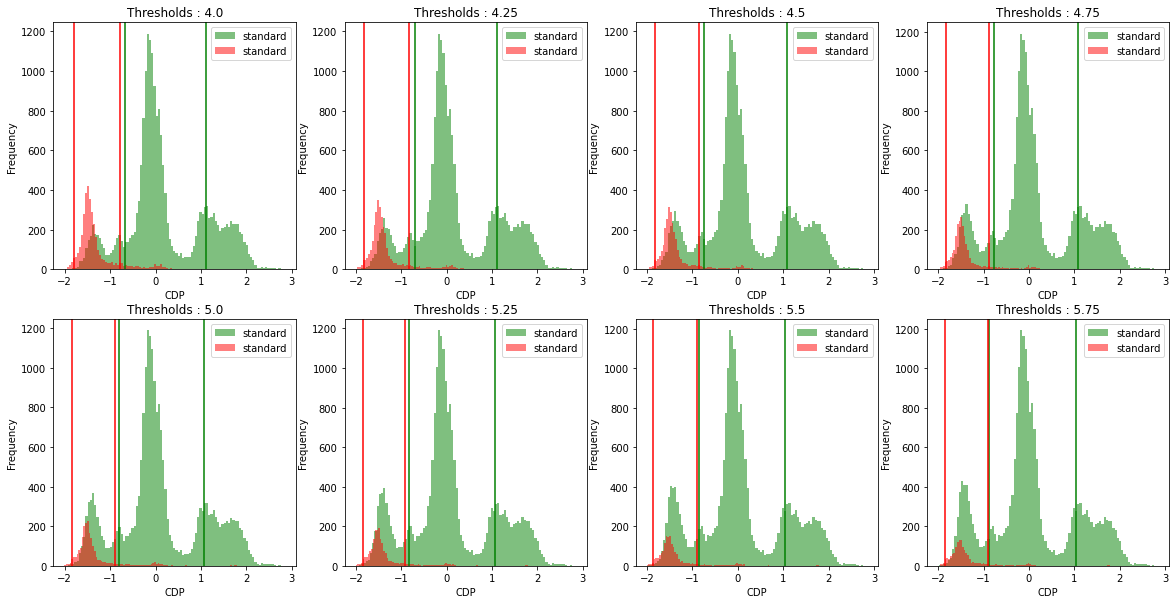

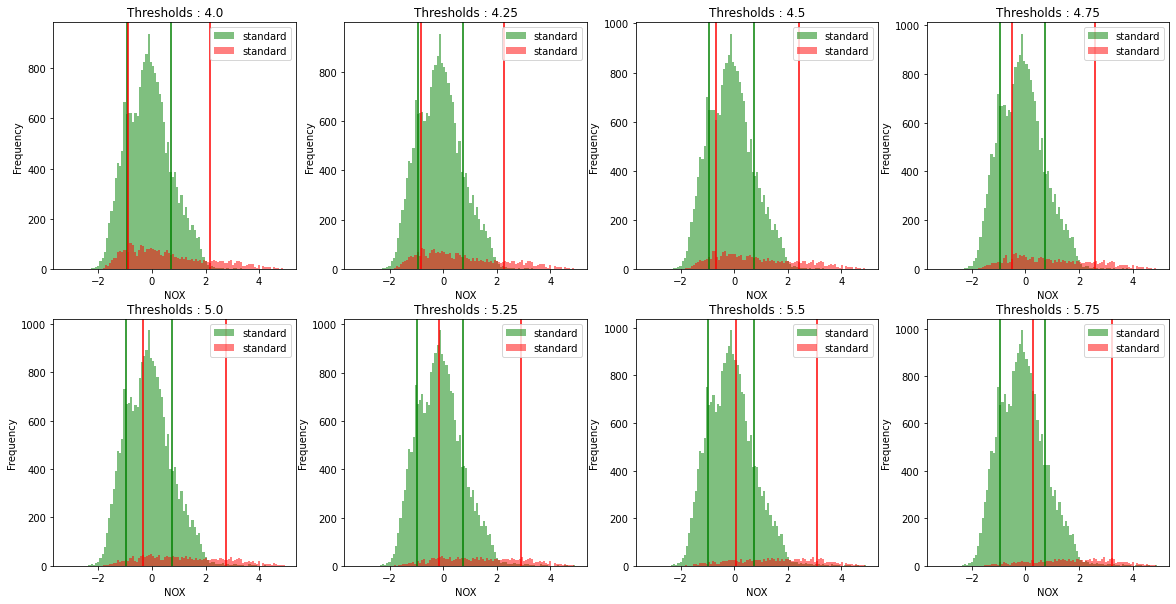

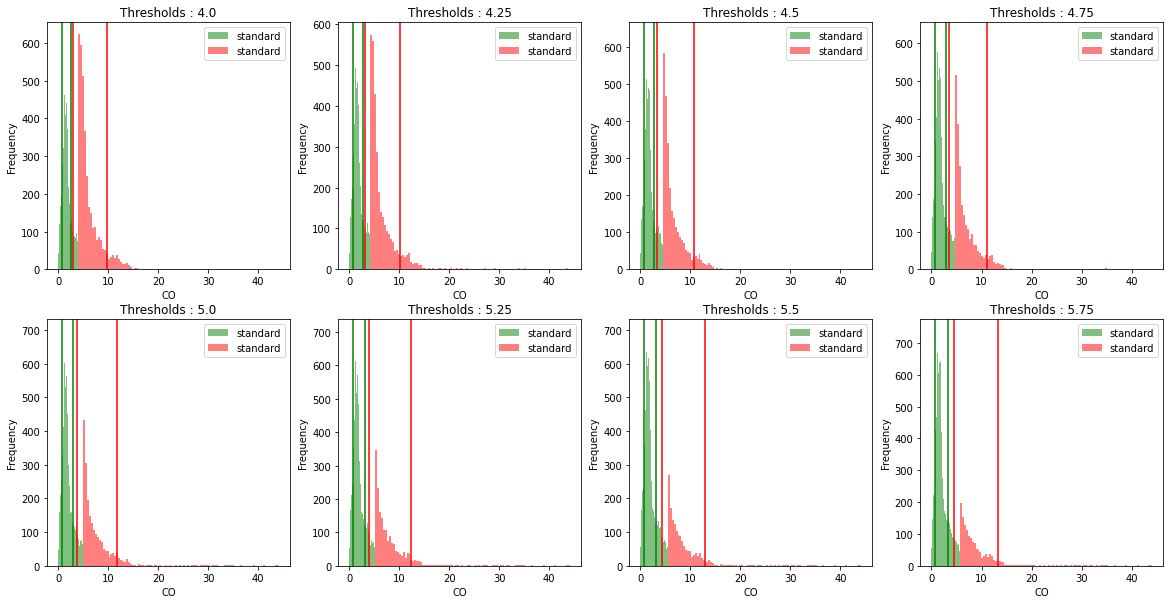

In [8]:
for col in dev_df.columns:
    fig, axs = plt.subplots(2,4, figsize = (20,10))
    for t, ax in zip(thresholds, axs.flatten()):
        standard_df = dev_df.loc[dev_df['CO'] < t, :]
        extreme_df = dev_df.loc[dev_df['CO'] >= t, :]
        
        standard_values = standard_df[col].values
        standard_mean = standard_values.mean()
        standard_std = standard_values.std()
        _ = ax.hist(standard_values, bins = 100, alpha = 0.5, color = 'green', label = 'standard') 
        ax.axvline(standard_mean-standard_std, alpha = 1, color = 'green')
        ax.axvline(standard_mean+standard_std, alpha = 1, color = 'green')
        
        
        extreme_values =  extreme_df[col].values
        extreme_mean = extreme_values.mean()
        extreme_std = extreme_values.std()
        _ = ax.hist(extreme_values, bins = 100, alpha = 0.5, color = 'red', label = 'standard') 
        ax.axvline(extreme_mean-extreme_std, alpha = 1, color = 'red')
        ax.axvline(extreme_mean+extreme_std, alpha = 1, color = 'red')
        
        
       
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Thresholds : {t}')
        ax.legend()
    plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score as f1

table = PrettyTable()
table.field_names = ['threshold','f1']

columns = ['TIT','TEY','CDP','NOX']




for t in thresholds:
    rf = RandomForestClassifier()
    
    dev_df['labels'] = dev_df['CO'].apply(lambda x : 0 if x<t else 1)
    
    X_train, X_test, y_train, y_test = train_test_split(dev_df.loc[:,columns],dev_df['labels'], 
                                                        random_state = 42, test_size = 0.25,
                                                        stratify = dev_df['labels'])
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    table.add_row([t, f1(y_pred, y_test)])



In [62]:
print(table)

+-----------+--------------------+
| threshold |         f1         |
+-----------+--------------------+
|    4.0    | 0.8058479532163741 |
|    4.25   | 0.7680311890838207 |
|    4.5    | 0.7549962990377498 |
|    4.75   | 0.7303571428571428 |
|    5.0    | 0.7461773700305809 |
|    5.25   | 0.7155067155067155 |
|    5.5    | 0.7467438494934877 |
|    5.75   | 0.7593749999999999 |
+-----------+--------------------+


In [92]:
def classify(record, threshold = 0):
    label = 1
    if record[0] > threshold:
        label = 0
    return label


for t in np.linspace(-2.5,0,11):
    pred = list(map(lambda x: classify(x,threshold = t), dev_df.loc[:, columns].values))
    y = dev_df['labels']
    print(f'{t} = {f1(y,pred)}')

dev_df['tit_labels'] = list(map(lambda x: classify(x,threshold = -1.75), dev_df.loc[:, columns].values))

-2.5 = 0.35962877030162416
-2.25 = 0.5249101181304572
-2.0 = 0.6353637901861252
-1.75 = 0.6445029624753127
-1.5 = 0.5667736361392249
-1.25 = 0.45185995623632375
-1.0 = 0.3964019851116626
-0.75 = 0.36455838850542327
-0.5 = 0.3398285268901014
-0.25 = 0.2926073483842408
0.0 = 0.24215409806240337


best TIT value -1.75

In [93]:
thresholds

[4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75]

['TIT', 'TEY', 'CDP', 'NOX']
0
TIT
1
TEY
2
CDP
3
NOX


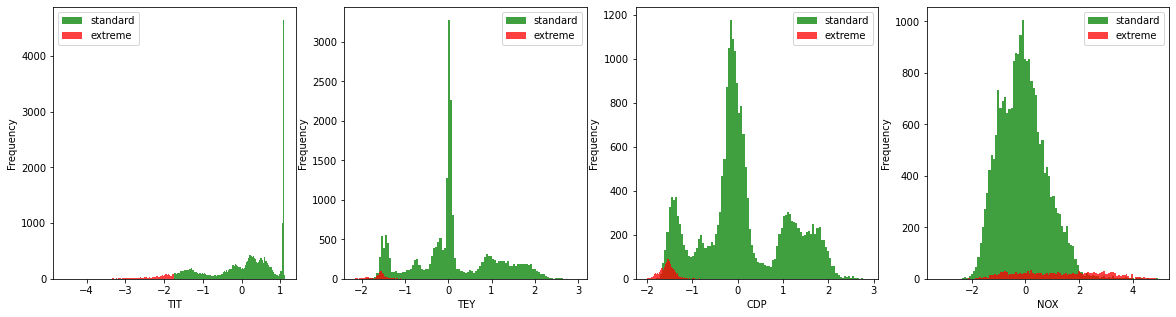

In [102]:
fig, axs = plt.subplots(1,4, figsize = (20,5))
standard_df = dev_df.loc[dev_df['tit_labels'] == 0, columns]
extreme_df = dev_df.loc[dev_df['tit_labels'] == 1, columns]
print(columns)

for i,col in enumerate(columns):
    print(i)
    print(col)
    _ = axs[i].hist(standard_df.loc[:, col].values, bins = 100, alpha = 0.75, color = 'green', label = 'standard') 
    _ = axs[i].hist(extreme_df.loc[:, col].values, bins = 100, alpha = 0.75, color = 'red', label = 'extreme')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

plt.show()

In [116]:
def classify(record, tit_threshold = -1.75, nox_threshold = -0.24):
    label = 0
    if record[0] < tit_threshold:
        if record[3] > nox_threshold:
            label = 1
    return label

m = [0,0]

for t in np.linspace(-2,2,51):
    pred = list(map(lambda x: classify(x,tit_threshold = -1.75, nox_threshold = t), dev_df.loc[:, columns].values))
    y = dev_df['labels']
    f = f1(y,pred)
    if m[1] < f:
        m = [t,f]

print(m)

dev_df['tit_nox_labels'] = list(map(lambda x: classify(x,tit_threshold = -1.75, nox_threshold = -0.24), dev_df.loc[:, columns].values))

[0.2400000000000002, 0.7272727272727272]


['TIT', 'TEY', 'CDP', 'NOX']
0
TIT
1
TEY
2
CDP
3
NOX


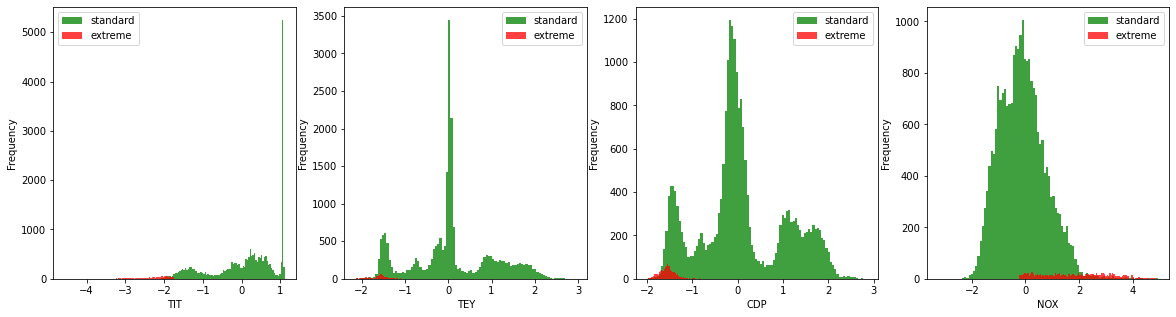

In [117]:
fig, axs = plt.subplots(1,4, figsize = (20,5))
standard_df = dev_df.loc[dev_df['tit_nox_labels'] == 0, columns]
extreme_df = dev_df.loc[dev_df['tit_nox_labels'] == 1, columns]
print(columns)

for i,col in enumerate(columns):
    print(i)
    print(col)
    _ = axs[i].hist(standard_df.loc[:, col].values, bins = 100, alpha = 0.75, color = 'green', label = 'standard') 
    _ = axs[i].hist(extreme_df.loc[:, col].values, bins = 100, alpha = 0.75, color = 'red', label = 'extreme')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

plt.show()

In [118]:
def classify(record, tit_threshold = -1.75, nox_threshold = -0.24, cdp_threshold = t):
    label = 0
    if record[0] < tit_threshold:
        if record[3] > nox_threshold :
            if record[0] < cdp_threshold:
                label = 1
    return label

m = [0,0]

for t in np.linspace(-2,2,51):
    pred = list(map(lambda x: classify(x,tit_threshold = -1.75, nox_threshold = -0.24, cdp_threshold = t), dev_df.loc[:, columns].values))
    y = dev_df['labels']
    f = f1(y,pred)
    if m[1] < f:
        m = [t,f]

print(m)

#dev_df['tit_nox_labels'] = list(map(lambda x: classify(x,tit_threshold = -1.75, nox_threshold = -0.24), dev_df.loc[:, columns].values))

[-1.68, 0.7166293810589114]


# Distribution of interactions

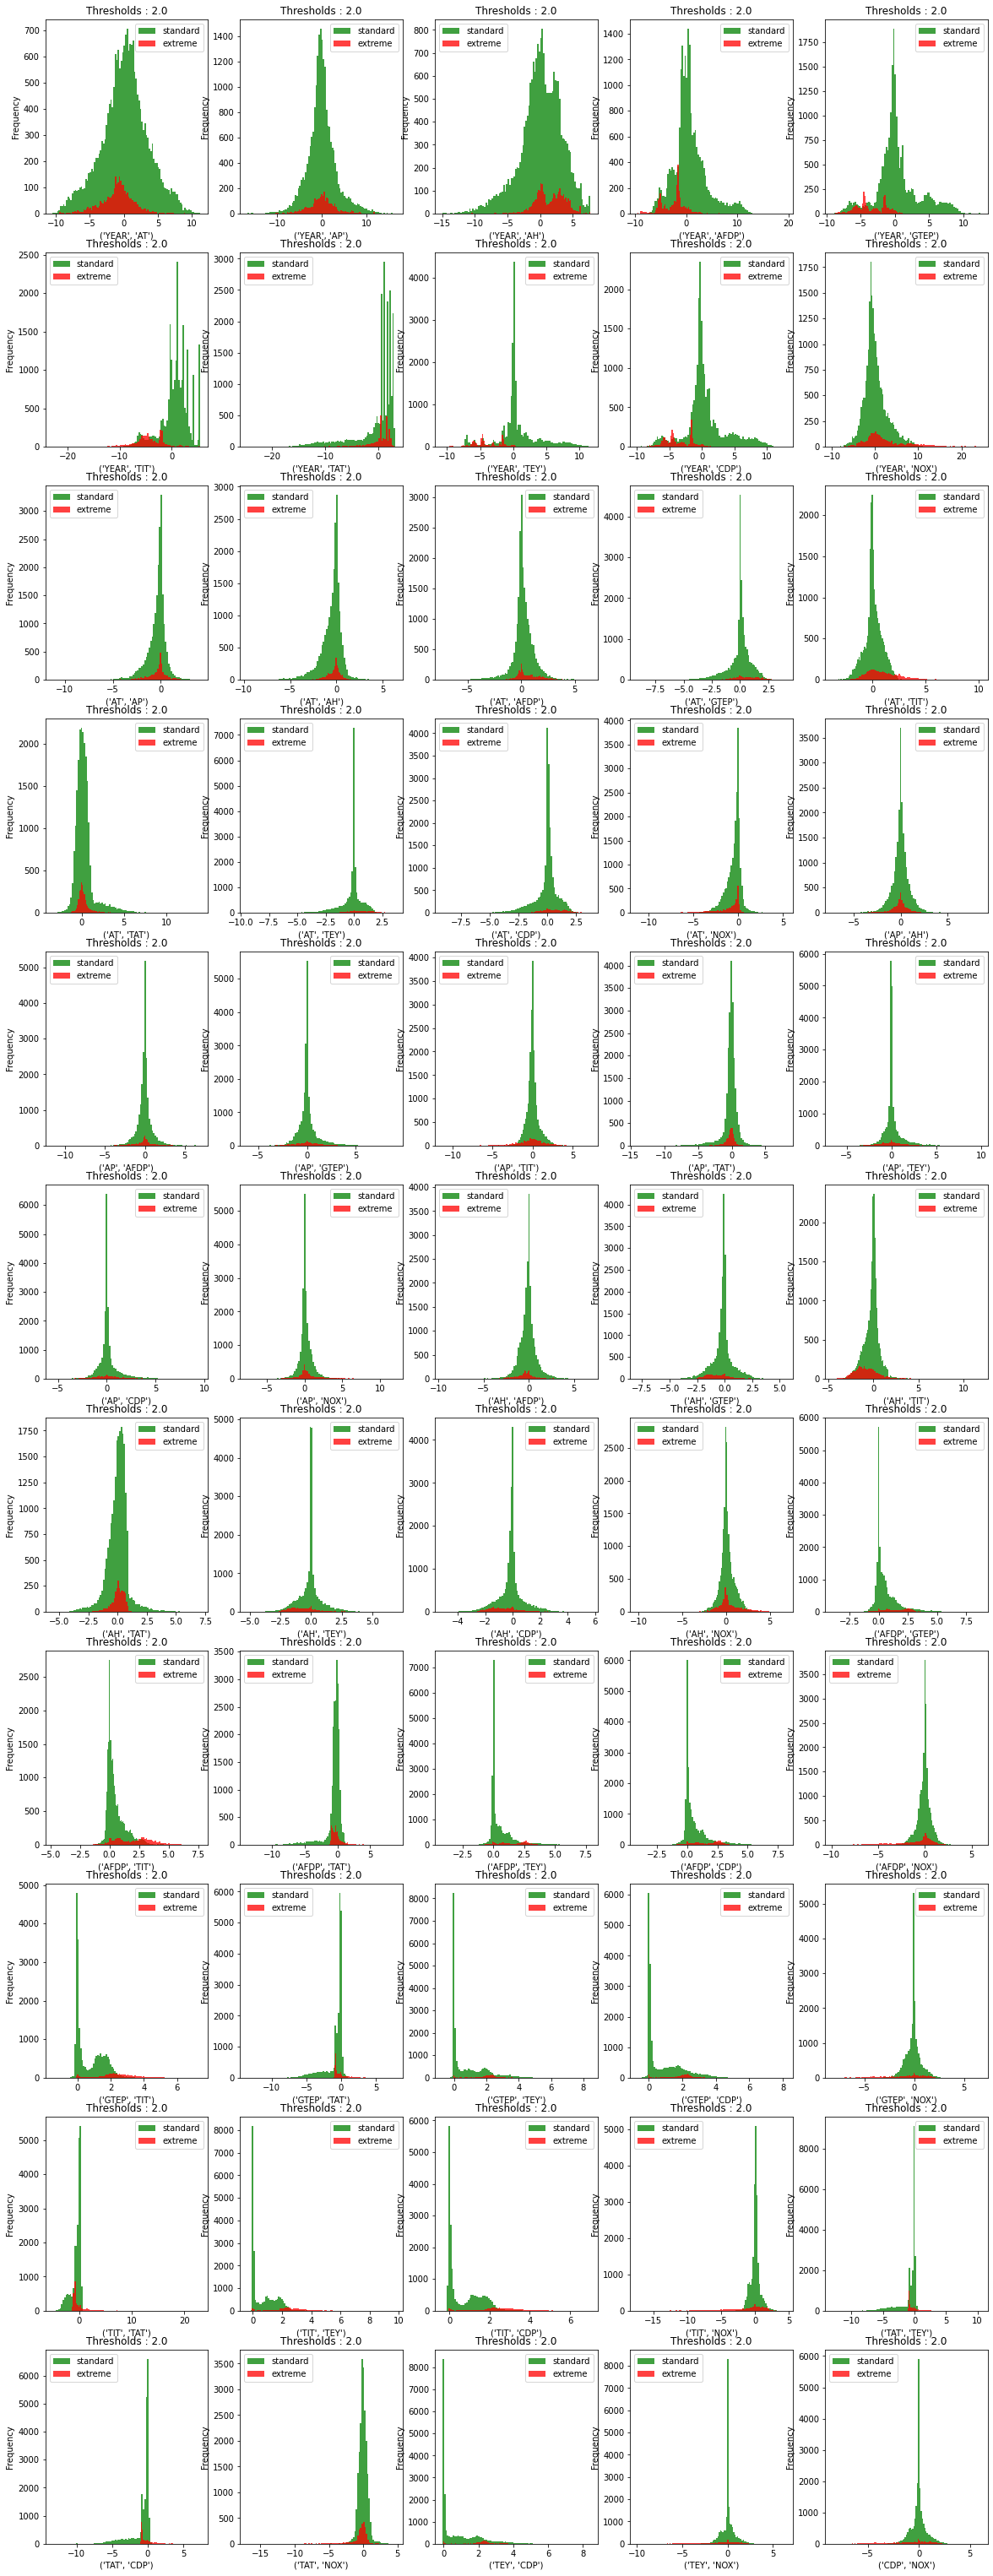

In [143]:
from itertools import combinations
fig, axs = plt.subplots(11,5, figsize = (20,55))

for c,ax in zip(list(combinations(dev_df.loc[:,:'NOX'].columns,2)), axs.flatten()):
    standard_df = dev_df.loc[dev_df['CO'] < 4.5, :]
    extreme_df = dev_df.loc[dev_df['CO'] >= 4.5, :]

        
    _ = ax.hist(standard_df[c[0]].values*standard_df[c[1]].values, bins = 100, alpha = 0.75, color = 'green', label = 'standard') 
    _ = ax.hist(extreme_df[c[0]].values*extreme_df[c[1]].values, bins = 100, alpha = 0.75, color = 'red', label = 'extreme')
    ax.set_xlabel(c)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Thresholds : {t}')
    ax.legend()
plt.show()

# Distributions of squares 

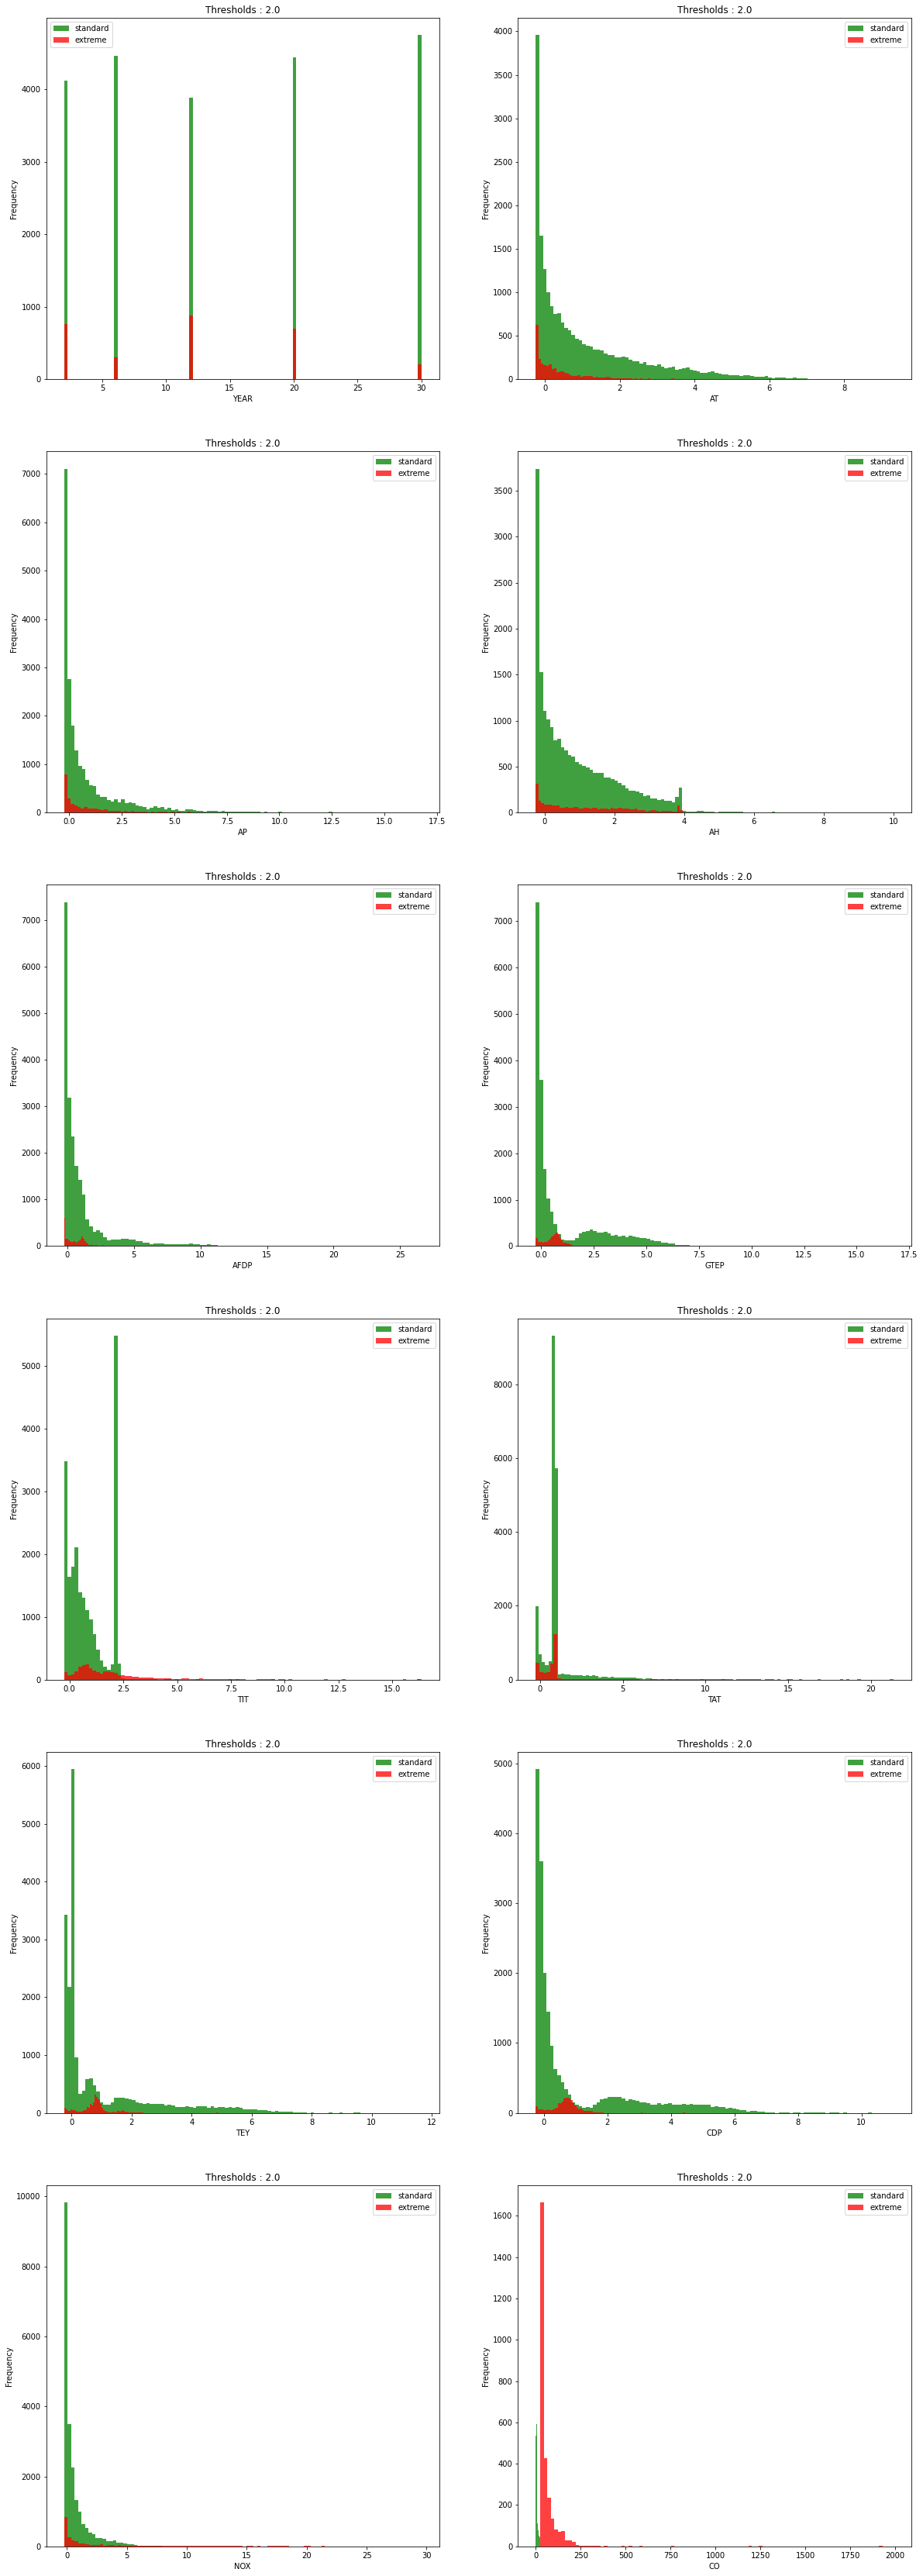

In [148]:

fig, axs = plt.subplots(6,2, figsize = (20,60))

for c,ax in zip(dev_df.columns, axs.flatten()):
    standard_df = dev_df.loc[dev_df['CO'] < 4.5, :]
    extreme_df = dev_df.loc[dev_df['CO'] >= 4.5, :]

        
    _ = ax.hist(standard_df[c].values + standard_df[c].values**2, bins = 100, alpha = 0.75, color = 'green', label = 'standard') 
    _ = ax.hist(extreme_df[c].values  + extreme_df[c].values**2, bins = 100, alpha = 0.75, color = 'red', label = 'extreme')
    ax.set_xlabel(c)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Thresholds : {t}')
    ax.legend()
plt.show()